Now we have [for loops]({{ site.baseurl }}/chapters/03/iteration) and
[ranges]({{ site.baseurl }}/chapters/03/Ranges), we can solve the problem in
[population, permutation]({{ site.baseurl
}}/chapters/05/population_permutation).

In [1]:
# Array library.
import numpy as np

# Data frame library.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Fancy plots
plt.style.use('fivethirtyeight')

We load the Brexit survey data again:

In [2]:
# Load the data frame, and put it in the variable "audit_data"
audit_data = pd.read_csv('audit_of_political_engagement_14_2017.tab', sep='\t')

Again, we get the ages for the Leavers and the Remainers:

In [3]:
# Drop rows where age is 0
age_not_0 = audit_data['numage'] != 0
good_data = audit_data[age_not_0]
# Get data frames for leavers and remainers
is_remain = good_data['cut15'] == 1
remain_ages = good_data[is_remain]['numage']
is_leave = good_data['cut15'] == 2
leave_ages = good_data[is_leave]['numage']

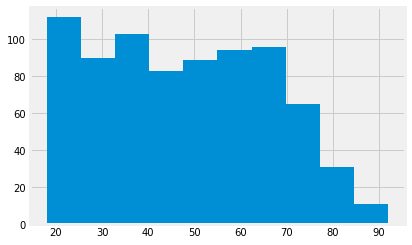

In [4]:
remain_ages.hist();

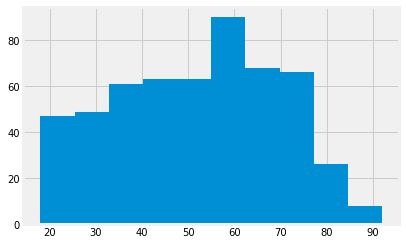

In [5]:
leave_ages.hist();

Here is the number of Remain voters:

In [6]:
n_remain = len(remain_ages)
n_remain

774

Here was the actual difference between the means of the two groups:

In [7]:
actual_diff = np.mean(leave_ages) - np.mean(remain_ages)
actual_diff

3.6998380833655773

We want to know if we have a reasonable chance of seeing a difference of this magnitude, if the two groups are samples from the same underlying population.  We don't have the actual population to take samples from, so we need to wing it, by using the data we have.

We asserted we could use permutation to take random samples from the data that we already have:

In [8]:
pooled = np.append(remain_ages, leave_ages)
np.random.shuffle(pooled)
fake_remainers = pooled[:n_remain]
fake_leavers = pooled[n_remain:]

Those are our samples.  Now we get the difference in mean ages, as one example of a difference we might see, if the samples are from the same population:

In [9]:
example_diff = np.mean(fake_leavers) - np.mean(fake_remainers)
example_diff

0.9205677112438906

Now we know how do to this once, we can use the `for` loop to do the
shuffle operation many times.  We collect the results in an array.
You will recognize the code in the `for` loop from the code in the
cells above.

In [10]:
# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    np.random.shuffle(pooled)
    fake_remainers = pooled[:n_remain]
    fake_leavers = pooled[n_remain:]
    eg_diff = np.mean(fake_leavers) - np.mean(fake_remainers)
    # Collect the results in the results array
    example_diffs[i] = eg_diff

Our results array now has 10000 fake mean differences:

What distribution do these differences have?

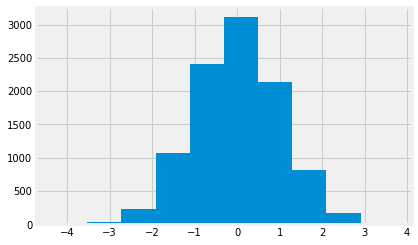

In [11]:
plt.hist(example_diffs);

This is called the *sampling distribution*.  In our case, this is the
sampling distribution of the difference in means.  It is the
*sampling* distribution, because it is the distribution we expect to
see, when taking random *samples* from the same underlying population.

Our question now is, is the difference we actually saw, a likely value, given the sampling distribution.

Looking at the distribution above - what do you think?

As a first pass, let us check how many of the values from the sampling
distribution are as large, or larger than the value we actually saw.

In [12]:
are_as_high = example_diffs  >= actual_diff
n_as_high = np.count_nonzero(are_as_high)
n_as_high

1

The number above is the number of values in the sampling distribution
that are as high as, or higher than, the value we actually saw.  If we
divide by 10000, we get the proportion of the sampling distribution
that is as high, or higher.

In [13]:
proportion = n_as_high / 10000
proportion

0.0001

We think of this proportion as an estimate of the *probability* that
we would see a value this high, or higher, *if these were random
samples from the same underlying population*.  We call this a *p
value*.